### University of Virginia
### DS 5559: Big Data Analytics
### 5.11 Final Project Assignment
#### Buckley Dowdle(Bd6fr), Jae Yoon Sung(js2yp), Luke Moles(lmm8fb), Latifa Hasan(lmh3ge)

In [65]:
import pandas as pd

#df = pd.read_csv('sample_data/2017_data.csv')
df = pd.read_csv('cleaned_data.csv')
df = df.iloc[:,1:9][df['label'] != 3.0]
df.label=df.label.replace(2.0, 0.0)
df.Smoke_Cigs=df.Smoke_Cigs.replace(3.0, 0.0)
df.HighBP=df.HighBP.replace(2.0, 0.0)
df

,label,Gender,Age,Race,Fam_hist,Smoke_Cigs,BMI,HighBP
0,0.0,0.0,27.0,1.0,1.0,0.0,35.9,0.0
2,0.0,1.0,37.0,3.0,0.0,1.0,48.9,0.0
3,0.0,0.0,33.0,6.0,0.0,2.0,27.4,0.0
4,0.0,1.0,26.0,7.0,0.0,0.0,33.3,0.0
5,0.0,1.0,77.0,3.0,0.0,0.0,20.8,0.0
...,...,...,...,...,...,...,...,...
27292,1.0,0.0,71.0,2.0,0.0,0.0,42.4,1.0
27293,0.0,1.0,57.0,3.0,0.0,0.0,28.3,0.0
27294,0.0,1.0,39.0,1.0,0.0,1.0,36.2,0.0
27295,0.0,0.0,27.0,4.0,1.0,1.0,23.1,0.0


In [67]:
#number of rows
df.shape[0]

26433

In [68]:
#number of columns
df.shape[1]

8

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26433 entries, 0 to 27296
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       26433 non-null  float64
 1   Gender      26433 non-null  float64
 2   Age         26433 non-null  float64
 3   Race        26433 non-null  float64
 4   Fam_hist    26433 non-null  float64
 5   Smoke_Cigs  26433 non-null  float64
 6   BMI         26433 non-null  float64
 7   HighBP      26433 non-null  float64
dtypes: float64(8)
memory usage: 1.8 MB


In [70]:
df.describe()

,label,Gender,Age,Race,Fam_hist,Smoke_Cigs,BMI,HighBP
count,26433.00000,26433.000000,26433.000000,26433.000000,26433.000000,26433.000000,26433.000000,26433.000000
mean,0.18859,0.385049,54.175954,3.413914,0.177695,0.474974,29.876355,0.439489
std,0.39119,0.486616,17.003588,1.520869,0.382263,0.649131,7.402991,0.496334
min,0.00000,0.000000,18.000000,1.000000,0.000000,0.000000,14.800000,0.000000
25%,0.00000,0.000000,40.000000,3.000000,0.000000,0.000000,24.900000,0.000000
50%,0.00000,0.000000,57.000000,3.000000,0.000000,0.000000,28.800000,0.000000
75%,0.00000,1.000000,68.000000,4.000000,0.000000,1.000000,33.700000,1.000000
max,1.00000,1.000000,80.000000,7.000000,1.000000,2.000000,74.800000,1.000000


In [71]:
#Percentage of Response variable
df.label.value_counts()/df.shape[0]

0.0    0.81141
1.0    0.18859
Name: label, dtype: float64

In [72]:
df.Gender.value_counts()#/df.shape[0]

0.0    16255
1.0    10178
Name: Gender, dtype: int64

In [73]:
df.Race.value_counts()/df.shape[0]

3.0    0.445844
4.0    0.221920
1.0    0.109938
2.0    0.080354
6.0    0.075550
7.0    0.066394
Name: Race, dtype: float64

In [74]:
df.Age.describe()

count    26433.000000
mean        54.175954
std         17.003588
min         18.000000
25%         40.000000
50%         57.000000
75%         68.000000
max         80.000000
Name: Age, dtype: float64

In [80]:
df_dummies = pd.get_dummies(df['Race'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([df, df_dummies], axis=1)
del df_new['Race']

In [81]:
df_new

,label,Gender,Age,Fam_hist,Smoke_Cigs,BMI,HighBP,1.0,2.0,3.0,4.0,6.0
0,0.0,0.0,27.0,1.0,0.0,35.9,0.0,1,0,0,0,0
2,0.0,1.0,37.0,0.0,1.0,48.9,0.0,0,0,1,0,0
3,0.0,0.0,33.0,0.0,2.0,27.4,0.0,0,0,0,0,1
4,0.0,1.0,26.0,0.0,0.0,33.3,0.0,0,0,0,0,0
5,0.0,1.0,77.0,0.0,0.0,20.8,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27292,1.0,0.0,71.0,0.0,0.0,42.4,1.0,0,1,0,0,0
27293,0.0,1.0,57.0,0.0,0.0,28.3,0.0,0,0,1,0,0
27294,0.0,1.0,39.0,0.0,1.0,36.2,0.0,1,0,0,0,0
27295,0.0,0.0,27.0,1.0,1.0,23.1,0.0,0,0,0,1,0


In [82]:
var_corr = df_new.corr()

Text(0.5, 1.0, '')

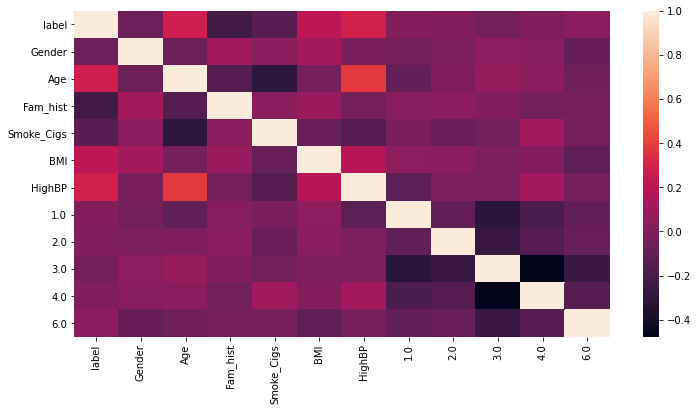

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,6))
sns.heatmap(var_corr)
plt.title("")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Diagnosis')

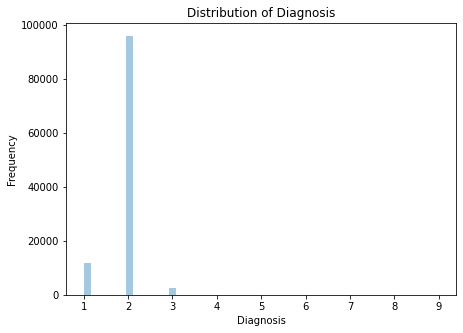

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df['Diagnosis'], kde=False)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')
plt.title('Distribution of Diagnosis')

Text(0.5, 0, 'Diagnosis')

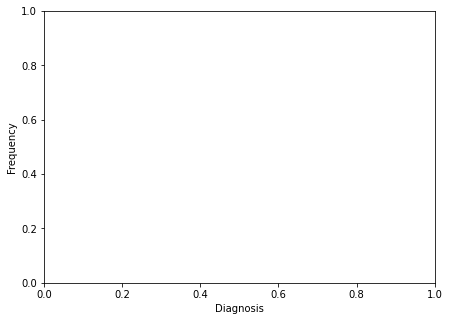

In [90]:
plt.figure(figsize=(7,5))
#sns.swarmplot(x='label', y='BMI', data=df_new)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')

Text(0.5, 0, 'Diagnosis')

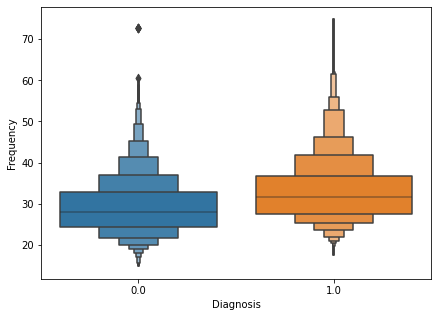

In [91]:
plt.figure(figsize=(7,5))
sns.boxenplot(x='label', y='BMI', data=df_new)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')

Text(0.5, 0, 'Diagnosis')

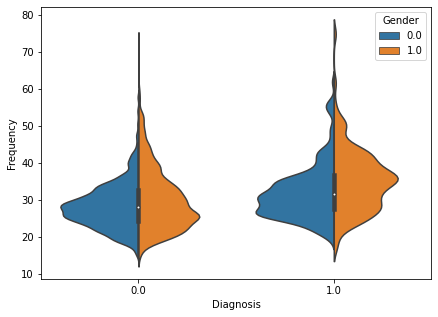

In [96]:
plt.figure(figsize=(7,5))
sns.violinplot(x='label', y='BMI', hue="Gender", data=df_new, split=True)
plt.ylabel('Frequency')
plt.xlabel('Diagnosis')

In [93]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_sugar'])
plt.xlabel("Distribution of Total_sugar")

KeyError: 'Total_sugar'

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of Total_fat')

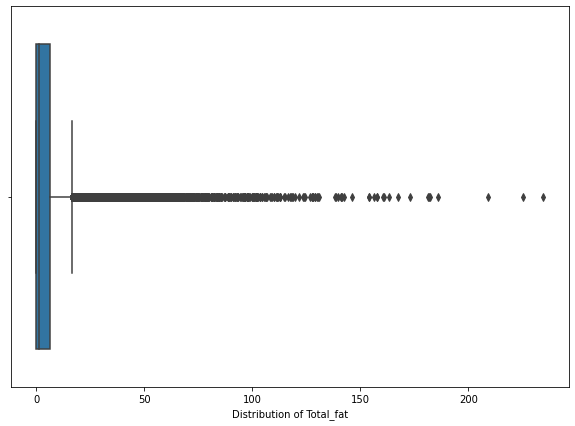

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_fat'])
plt.xlabel("Distribution of Total_fat")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Distribution of Total_fat')

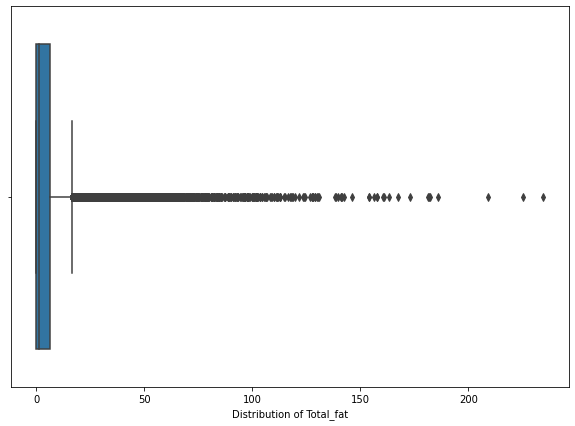

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(df['Total_fat'])
plt.xlabel("Distribution of Total_fat")